# Neville's method

The file `lagrange_neville.pdf` presents some notes about the Neville's method.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

#used for inserting images
from IPython.display import Image as img

In [2]:
x = np.linspace(0., 10., 5) # x coordinates of the data
y = np.sin(2.*np.pi*x/10.)  # data values

In [3]:
x0 = np.linspace(-3., 13., 30) # x coordinates of the interpolating points
y0 = np.sin(2.*np.pi*x0/10.)   # true values of the original function at the interpolation points

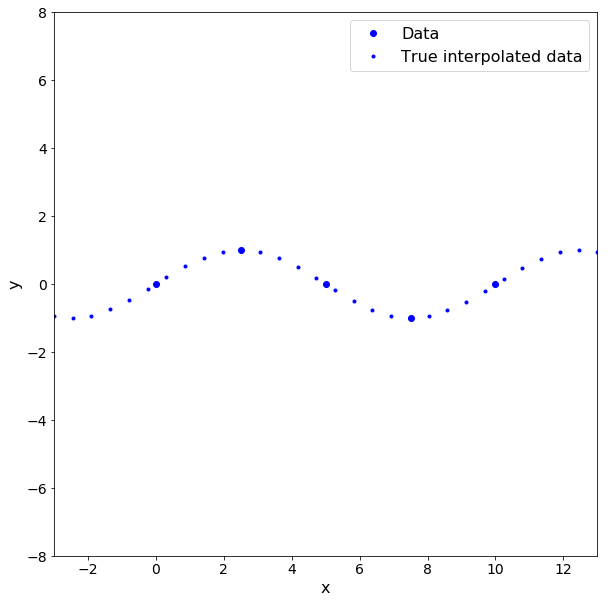

In [4]:
plt.figure(figsize=(10,10))
plt.axis('scaled')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b.', label='True interpolated data')
plt.xlim(np.min(x0), np.max(x0))
plt.ylim(-8., 8.)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', numpoints=1, fontsize=16)
plt.show()

### Simple implementation

The function below implements the Neville's method for interpolation.

In [5]:
def my_neville(x, y, xc):
    '''
    Return an interpolated point by applying
    the Neville's method.
    
    input
    x: numpy array 1D - x coordinates
    y: numpy array 1D - given values of a function y(x)
    xc: float - coordinate x of the interpolating point
    
    output
    yc: float - interpolated ordinate at xc
    '''
    aux = y.copy()
    for j in range(1,x.size):
        for k in range(x.size-j):
            aux[k] = ((xc - x[j+k])*aux[k] + (x[k] - xc)*aux[k+1])/(x[k] - x[j+k])
        
    yc = aux[0]
    return yc

### Interpolation calculated by using the function `my_neville`

The cell below shows how to use the function `my_neville` for interpolating the function `y` on a set of points `x0`.

In [6]:
my_result = np.empty_like(x0)
for i, xc in enumerate(x0):
    my_result[i] = my_neville(x, y, xc)

### Interpolation calculated by using the function [`scipy.interpolate.lagrange`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)

In [7]:
Lagrange = lagrange(x,y)

In [8]:
scipy_result = Lagrange(x0)

### Validation test

In [9]:
np.allclose(scipy_result, my_result)

True

### Results

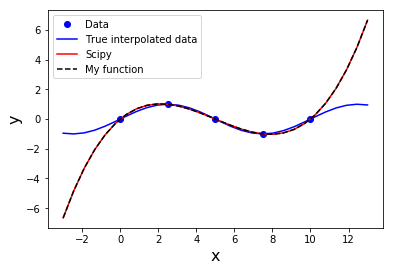

In [11]:
plt.figure()
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b-', label='True interpolated data')
plt.plot(x0, scipy_result, 'r-', label='Scipy')
plt.plot(x0, my_result, 'k--', label = 'My function')
plt.legend(loc='best', numpoints=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend(loc='best', numpoints=1)
plt.show()

### Exercise (extra)

The directory `synthetic_gravity_data` contains a jupyter notebook named [`synthetic_data_fatiando.ipynb`](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/synthetic_gravity_data/synthetic_grav_data_fatiando.ipynb). This code uses the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://www.fatiando.org/) for calculating the gravity anomaly produced by the following synthetic body:

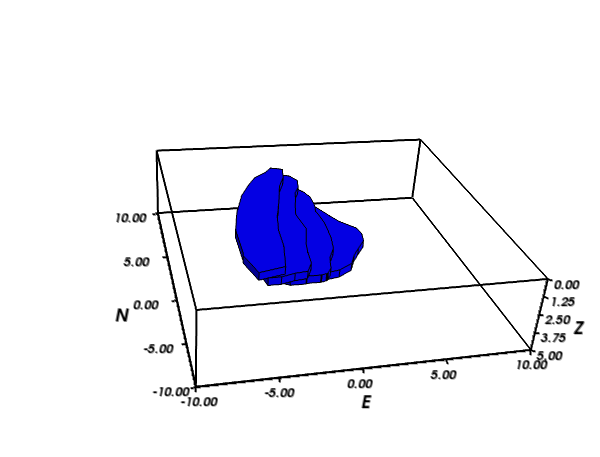

In [12]:
img('synthetic_gravity_data/model.png')

The synthetic body shown above produces the gravity anomaly shown below:

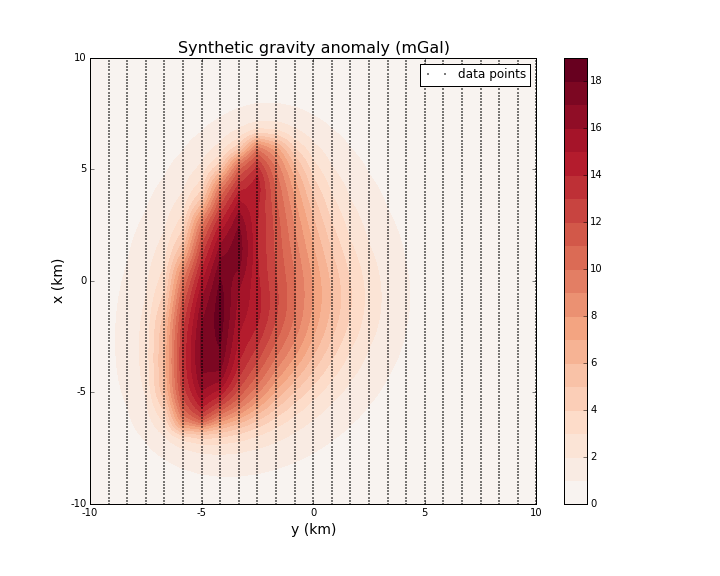

In [13]:
img('synthetic_gravity_data/map.png')

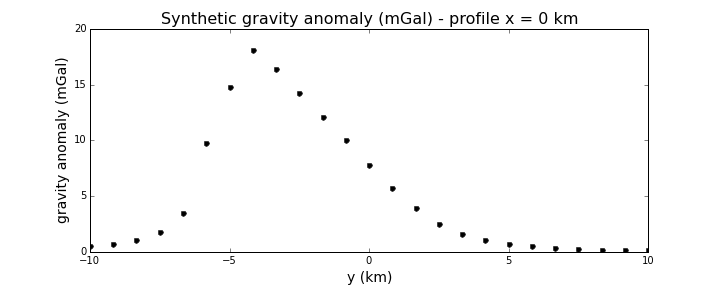

In [14]:
img('synthetic_gravity_data/profile.png')

The files `synthetic_gravity_data/gravity_anomaly.txt` and `synthetic_gravity_data/gravity_anomaly_profile.txt` contain, respectively, the synthetic gravity anomaly map and the gravity anomaly profile on x = 0 m.

To solve this exercise:

1. Load the file `synthetic_gravity_data/gravity_anomaly_profile.txt` by using the routine [`numpy.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). 

2. Use the function `my_neville` to calculate one interpolated gravity data between two adjacent gravity data (black dots on the gravity profile) on the profile.

3. Plot a Figure similar to the gravity profile shown above containing: (i) the original data (black dots on the gravity profile) and (ii) the interpolated points.